### - Use case title: Identification of changes in Amazon rain forests from surface albedo
### - User question: *Does the resolution of albedo dataset allow to identify the changes in forest areas due to human activities?*

### Quality assessment statement (Take-home messages)

The C3S surface albedo dataset:
* identifies changes in forests area due to human activities.
* reveals decline of 87.06% forest land in the selected area of the State of Rondonia's Amazon forests, Brazil.
* is cloud-free, hence the obtained results are unaffected by cloud contamination.

## Introduction

C3S "Surface albedo 10-daily gridded data from 1981 to present" provides global coverage of Earth surface albedo, i.e., an essential climate variable. It provides information on the radiative basis, thus on the temperature and water balance. The directional albedo or directional-hemispherical reflectance (also called black-sky albedo) is defined as the integration of the bi-directional reflectance over the viewing hemisphere. It assumes all energy is coming from a direct radiation from the sun and is computed for the local solar noon. The current algorithm is applied at a 10-day frequency on daily surface reflectances acquired during a moving temporal window of 20 days. Multiple platform/sensors were used offering various spatial resolution and temporal coverage (1 km from SPOT-VGT and PROBA-V, 4 km from AVHRR). Products are available from 1981 to present.

Amazon is the world's largest rainforest. Besides, being rich in biodiversity, it plays a significant role in maintaining earth’s atmosphere (Brandão et al., 2022). However, due to various reasons such as cropping, cattle ranching, mining and commercial farming etc, the forest is witnessing huge deforestation (Cruz et al., 2021). Deforestation has a key contribution to the global hydrological cycle and, energy budget as well as on the preservation of the ecosystems. Satellite-derived albedo data offers a critical means to monitor Amazon rainforest coverage and assess the impact of human activities. By analyzing changes in surface reflectivity due to the conversion of vegetation to other land uses with satellite data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), users can quantify the extent of forest loss and degradation attributable to human intervention. Such insights are essential for informing conservation strategies and promoting sustainable land management practices in the region.

This notebook assesses the capability of the  albedo dataset in identifying changes in coverage of forest areas due to the human activities.

### Methodology

1. Download surface albedo data NOAA-11 AVHRR v2 (time-period 1990-1991) (horizontal_resolution: ~ 4km) and PROBA-VGT v2 (time-period 2018-2019) (horizontal_resolution: ~ 1km) (ALBB_BH (broadband hemispherical albedo over total spectrum); temporal resolution: 10 days)
2. Define plotting and printing area statistics function
3. Create raster plot of regridded NOAA-11 AVHRR (1990-1991) and calculate area covered by forests and non-forest area during that time-period.
4. Create raster plot of regridded PROBA VGT (2018-2019) and calculate area covered by forests and non-forest area during that time-period.
5. For validation of the results, refer to and import Google Earth images of the region corresponding to both time-periods.

### Set-up of analysis and data retrieval

* Import packages: We use standard libraries (numpy, pandas, xarray, cartopy.crs, matplotlib.colors, matplotlib.pyplot) for this notebook. 
* Define parameters and transform data: After defining the parameters, w we use a very basic processingtimeal weighted me)an over the entirchosen region and transform the data.
* Define area printing function: Further, we define the function to plot the raster data and print the area statistics as per the specified threshold.
* Regridding: As NOAA-AVHRR dataset (4km) has lower spatial resolution than PROBA-VGT (1km), it is regridded to the grid size of PROBA-VGT.
* Raster plot and area calculation: Using the function defined above, we created raster plot of the region for both the time-periods. 
* Validation: We imported the Google Earth images of the region for both the time-periods for visual validation of the results obtained from albedo.

100%|██████████| 24/24 [00:01<00:00, 19.44it/s]


threshold=0.215
resolution={'latitude': 16, 'longitude': 17}

Non-Forest:
	Number of pixels: 17
	Total area: 16.47km2

Forest:
	Number of pixels: 255
	Total area: 247.11km2


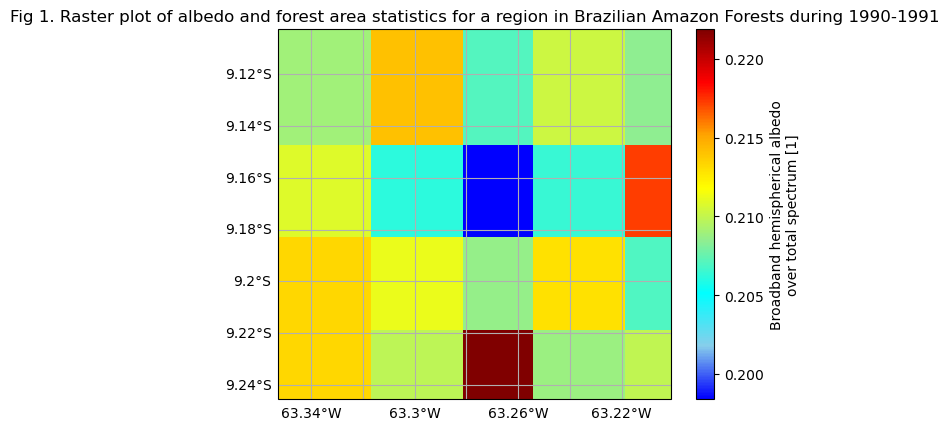

threshold=0.1625
resolution={'latitude': 16, 'longitude': 17}

Non-Forest:
	Number of pixels: 239
	Total area: 231.60km2

Forest:
	Number of pixels: 33
	Total area: 31.98km2


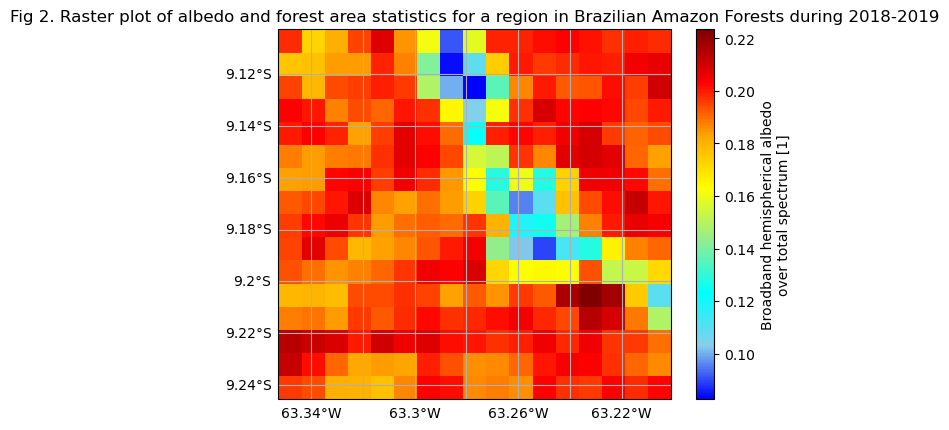

In [32]:
#__________________
# Import packages
#__________________


import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/Balha_Akanksha/.cdsapirc")
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from c3s_eqc_automatic_quality_control import diagnostics, download, plot,utils
warnings.filterwarnings("ignore")


#__________________
# Define parameters
#__________________

collection_id_albedo_noaa = "satellite-albedo"
request_albedo_noaa = {
    "format": "zip",
    "variable": "albb_bh",
    "satellite": "noaa_11",
    "sensor": "avhrr",
    "product_version": "v2",
    "horizontal_resolution": "4km",
    "year": ["1990", "1991"],
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "nominal_day": "10",
    "area": [-9.10, -63.35, -9.25, -63.20],
}

collection_id_albedo_proba = "satellite-albedo"
request_albedo_proba = {
    "format": "zip",
    "variable": "albb_bh",
    "satellite": "proba",
    "sensor": "vgt",
    "product_version": "v2",
    "horizontal_resolution": "1km",
    "year": ["2018", "2019"],
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "nominal_day": "10",
    "area": [-9.10, -63.35, -9.25, -63.20],
}


#__________________
# Transform data
#__________________

# Albedo maps of NOAA
ds_albedo_maps_noaa = download.download_and_transform(
    collection_id_albedo_noaa,
    request_albedo_noaa,
    transform_func=diagnostics.time_weighted_mean,
    transform_chunks=False,
    split_all=True,
    drop_variables=["crs"],
)

# Albedo timeseries of NOAA
ds_albedo_timeseries_noaa = download.download_and_transform(
    collection_id_albedo_noaa,
    request_albedo_noaa,
    transform_func=diagnostics.spatial_weighted_std,
    split_all=True,
    drop_variables=["crs"],
)


# Albedo maps of PROBA
ds_albedo_maps_proba = download.download_and_transform(
    collection_id_albedo_proba,
    request_albedo_proba,
    transform_func=diagnostics.time_weighted_mean,
    transform_chunks=False,
    split_all=True,
    drop_variables=["crs"],
)

# Albedo timeseries of PROBA
ds_albedo_timeseries_proba = download.download_and_transform(
    collection_id_albedo_proba,
    request_albedo_proba,
    transform_func=diagnostics.spatial_weighted_std,
    split_all=True,
    drop_variables=["crs"],
)


#________________________________________________________
# Define plotting and printing area statistics function
#________________________________________________________

def plot_and_print_area_statistics(da, threshold):
    resolution = dict(da.sizes)
    print(f"{threshold=}")
    print(f"{resolution=}")
    grid_cell_area = diagnostics.grid_cell_area(da)
    masks = {
        "Non-Forest": da > threshold,
        "Forest": da < threshold,
    }
    for label, mask in masks.items():
        n_pixels = mask.sum()
        total_area = grid_cell_area.where(mask).sum(keep_attrs=True)
        if total_area.attrs["units"] == "m2":
            with xr.set_options(keep_attrs=True):
                total_area *= 1.0e-6
            total_area.attrs["units"] = "km2"
        print(f"\n{label}:")
        print(f"\tNumber of pixels: {n_pixels.values}")
        print(f"\tTotal area: {total_area.values:.2f}{total_area.attrs['units']}")

    colors = [
        "blue",
        "skyblue",
        "cyan",
        "lightgreen",
        "yellow",
        "orange",
        "red",
        "maroon",
    ]
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomColorMap", colors)
    return plot.projected_map(da, cmap=custom_cmap, show_stats=False)


#___________________________________________________
# Regridding NOAA dataset and creating raster plot
#___________________________________________________

da_albedo_noaa = ds_albedo_maps_noaa["AL_BH_BB"]

da_albedo_noaa_regrid = diagnostics.regrid(
    da_albedo_noaa, grid_out=da_albedo_proba, method="nearest_s2d"
)
_ = plot_and_print_area_statistics(da_albedo_noaa_regrid, threshold=0.215)
plt.title("Fig 1. Raster plot of albedo and forest area statistics for a region in Brazilian Amazon Forests during 1990-1991")
plt.show()


da_albedo_proba = ds_albedo_maps_proba["AL_BH_BB"]
_ = plot_and_print_area_statistics(da_albedo_proba, threshold=0.1625)
plt.title("Fig 2. Raster plot of albedo and forest area statistics for a region in Brazilian Amazon Forests during 2018-2019")
plt.show()


Fig 3. Google earth image of study area for year 1990

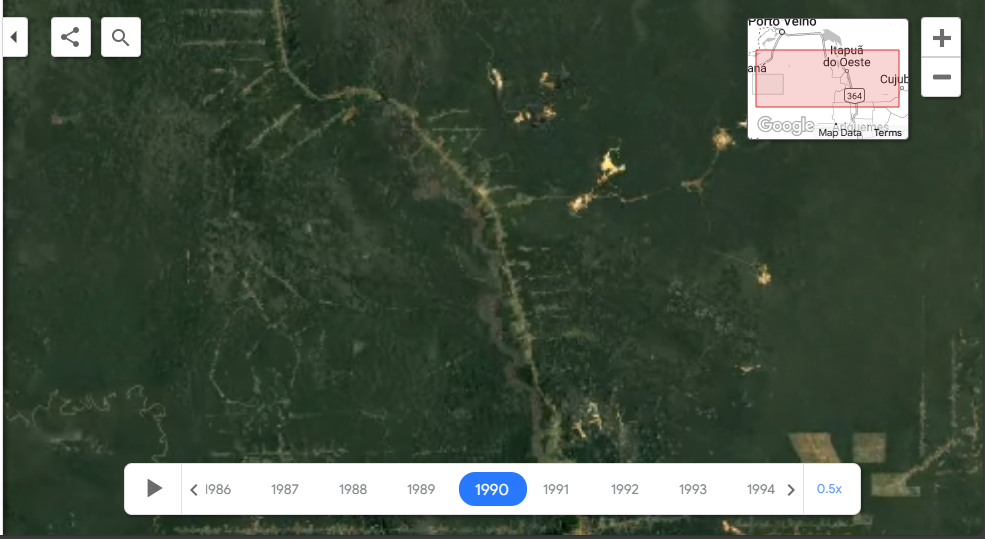

Fig 4. Google earth image of study area for year 2019

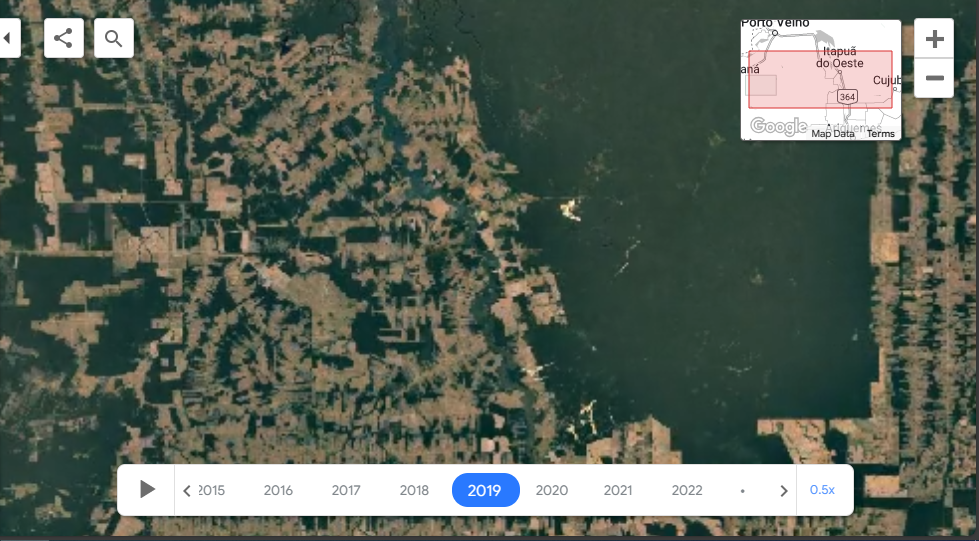

### Main Outcome

1. The resolution of CDS surface albedo 10-daily gridded dataset is sufficient for identifying the changes in forests area due to anthropogenic activities.
2. In the selected area of the Brazilian Amazon forests, forest land covering 247.11 km2 and non-forest land spanning 16.47 km2 were observed during 1990-91. However, during 2018-19, the forest area reduced to 31.98 km2 while non-forest land significantly increased to 231.60 km2. It is important to note that the albedo dataset is cloud-free (Copernicus PUG, 2021), ensuring the results remain unaffected by cloud contamination.
3. Thus, over nearly three decades, there was a decline of 87.06% in forest land.
4. Cruz et al. (2021) reported that in last four decades, 20% of Brazilian Amazon Forests had been deforestated by 2018.
5. These findings align with those of Brandão et al. (2022) which state that entire Amazonian forest region experienced 17% deforestation during 1995-2017. Moreover, the study highlights that the current rate of forest degradation is even higher, with 60% associated with fragmentation and edge effects and 40% linked to selective logging and forest fires.
6. This study show that CDS surface albedo can be used for quantifying changes in forest area.

### References

1. Brandão, D. O., Barata, L. E. S., & Nobre, C. A. (2022). The effects of environmental changes on plant species and forest dependent communities in the Amazon region. Forests, 13(3), 466.
2. Copernicus PUG (Product User Guide and Specification), CDR Multi-Sensor Surface Albedo v2.0. (2021) https://datastore.copernicus-climate.eu/ (Retrieved on Mar 11, 2024)
3. Cruz, D. C., Benayas, J. M. R., Ferreira, G. C., Santos, S. R., & Schwartz, G. (2021). An overview of forest loss and restoration in the Brazilian Amazon. New Forests, 52, 1-16.
4. Harvey, C. & E&E News. (2023) One Third of the Amazon Has Been Degraded by Human Activities. SCIAMI. https://www.scientificamerican.com (Retrieved on Feb 16, 2024).